In [4]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

input_data = [1,2,3,4,5]
x = tf.placeholder(dtype=tf.float32)
y = x * 2
sess = tf.Session()
result = sess.run(y, feed_dict={x:input_data})
print(result)

[ 2.  4.  6.  8. 10.]


In [5]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

#실행할때마다 같은 결과를 출력하기 위한 seed 값 설정
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

x_data = np.array([[2,3],[4,3],[6,4],[8,6],[10,7],[12,8],[14,9]])
y_data = np.array([0,0,0,1,1,1,1]).reshape(7,1)

X = tf.placeholder(tf.float64, shape=[None, 2])
Y = tf.placeholder(tf.float64, shape=[None, 1])

#기울기 a와 바이어스 b값을 임의로 정함, a는 a1 a2로 변환
a = tf.Variable(tf.random_uniform([2,1], dtype=tf.float64)) # [2,1]은 들어오는 값 2개 나가는 값 1개
b = tf.Variable(tf.random_uniform([1], dtype=tf.float64))

y = tf.sigmoid(tf.matmul(X, a) + b) # ax+b의 시그모이드

loss = -tf.reduce_mean(Y * tf.log(y) + (1-Y) * tf.log(1-y))
                      
lr = 0.1

gradient_decent = tf.train.GradientDescentOptimizer(lr).minimize(loss)

predicted = tf.cast(y > 0.5, dtype=tf.float64)  #cast함수는 조건이 맞으면 1, 아니면 0
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float64))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(3001):
        a_,b_,loss_, _ = sess.run([a,b,loss,gradient_decent], feed_dict={X:x_data, Y:y_data})
        if (i+1) % 300 == 0:
            print("step:%d, a1 = %.4f, a2 = %.4f, b = %.4f, loss = %.4f"%(i+1, a_[0],a_[1],b_,loss_))
            
    print("predicted=", sess.run(predicted, feed_dict={X:x_data}))
    
    p_val, h_val = sess.run([predicted, y], feed_dict={X:[[1,5],[10,5],[4,5]]})
    print("check predicted =", p_val)
    print("check hypothesis =", h_val)
    
    p_val, h_val = sess.run([predicted, y], feed_dict={X:[[7,6]]})
    print("check predicted =", p_val)
    print("check hypothesis =", h_val)
    
    h, c, a = sess.run([y, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
    print("\nHypotesis:", h, "\nCorrect (Y):", c, "\nAccuracy : ", a) 

step:300, a1 = 0.7668, a2 = -0.4862, b = -2.4275, loss = 0.2669
step:600, a1 = 0.7891, a2 = -0.2440, b = -3.9078, loss = 0.1906
step:900, a1 = 0.7099, a2 = 0.0686, b = -4.9724, loss = 0.1490
step:1200, a1 = 0.6129, a2 = 0.3656, b = -5.8134, loss = 0.1221
step:1500, a1 = 0.5185, a2 = 0.6323, b = -6.5106, loss = 0.1032
step:1800, a1 = 0.4322, a2 = 0.8687, b = -7.1066, loss = 0.0892
step:2100, a1 = 0.3551, a2 = 1.0780, b = -7.6275, loss = 0.0785
step:2400, a1 = 0.2865, a2 = 1.2642, b = -8.0901, loss = 0.0700
step:2700, a1 = 0.2255, a2 = 1.4309, b = -8.5063, loss = 0.0632
step:3000, a1 = 0.1712, a2 = 1.5811, b = -8.8847, loss = 0.0575
predicted= [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]]
check predicted = [[0.]
 [1.]
 [0.]]
check hypothesis = [[0.30852098]
 [0.67522898]
 [0.42701229]]
check predicted = [[1.]]
check hypothesis = [[0.85821142]]

Hypotesis: [[0.02189856]
 [0.03055491]
 [0.17746311]
 [0.87777327]
 [0.98006376]
 [0.99703718]
 [0.99956608]] 
Correct (Y): [[0.]
 [0.]
 [0.]
 [1.]


In [6]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

#실행할때마다 같은 결과를 출력하기 위한 seed 값 설정
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

data = np.loadtxt("C:/Users/tiger/Deeplearning/data-03-diabetes.csv", delimiter=",")


x_data = np.array([i[0:8] for i in data])
y_data = np.array([i[8] for i in data]).reshape(-1,1)

X = tf.placeholder(tf.float64, shape=[None, 8])
Y = tf.placeholder(tf.float64, shape=[None, 1])

a = tf.Variable(tf.random_uniform([8,1], dtype=tf.float64)) 
b = tf.Variable(tf.random_uniform([1], dtype=tf.float64))

y = tf.sigmoid(tf.matmul(X, a) + b) # ax+b의 시그모이드

loss = -tf.reduce_mean(Y * tf.log(y) + (1-Y) * tf.log(1-y))
                      
lr = 0.1

gradient_decent = tf.train.GradientDescentOptimizer(lr).minimize(loss)

predicted = tf.cast(y > 0.5, dtype=tf.float64)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float64))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(30001):
        a_,b_,loss_, _ = sess.run([a,b,loss,gradient_decent], feed_dict={X:x_data, Y:y_data})
        if (i+1) % 300 == 0:
            print("step:%d, a1 = %.4f, a2 = %.4f, a3 = %.4f, a4 = %.4f, a5 = %.4f, a6 = %.4f, a7 = %.4f, a8 = %.4f, b = %.4f, loss = %.4f"%(i+1, a_[0],a_[1],a_[2],a_[3],a_[4],a_[5],a_[6],a_[7],b_,loss_))
            
    print("predicted=", sess.run(predicted, feed_dict={X:x_data}))
    
    h, c, a = sess.run([y, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
    print("\nHypotesis:", h, "\nCorrect (Y):", c, "\nAccuracy : ", a) 

step:300, a1 = -0.4649, a2 = -1.0280, a3 = 0.2508, a4 = -0.2104, a5 = -0.1650, a6 = -0.6958, a7 = 0.0068, a8 = -0.2987, b = 0.4100, loss = 0.5492
step:600, a1 = -0.6924, a2 = -2.0014, a3 = 0.0815, a4 = -0.4005, a5 = -0.3171, a6 = -1.1526, a7 = -0.3288, a8 = -0.2262, b = 0.2971, loss = 0.4994
step:900, a1 = -0.7776, a2 = -2.5327, a3 = 0.0307, a4 = -0.4871, a5 = -0.3484, a6 = -1.4476, a7 = -0.5483, a8 = -0.1591, b = 0.2652, loss = 0.4844
step:1200, a1 = -0.8181, a2 = -2.8597, a3 = 0.0241, a4 = -0.5331, a5 = -0.3493, a6 = -1.6592, a7 = -0.6916, a8 = -0.1143, b = 0.2515, loss = 0.4783
step:1500, a1 = -0.8411, a2 = -3.0741, a3 = 0.0376, a4 = -0.5592, a5 = -0.3431, a6 = -1.8201, a7 = -0.7865, a8 = -0.0872, b = 0.2422, loss = 0.4755
step:1800, a1 = -0.8559, a2 = -3.2198, a3 = 0.0608, a4 = -0.5741, a5 = -0.3365, a6 = -1.9472, a7 = -0.8502, a8 = -0.0722, b = 0.2340, loss = 0.4741
step:2100, a1 = -0.8660, a2 = -3.3212, a3 = 0.0886, a4 = -0.5822, a5 = -0.3314, a6 = -2.0501, a7 = -0.8933, a8 = -0.

In [57]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

data = np.loadtxt("C:/Users/tiger/Deeplearning/data-03-diabetes.csv", delimiter=",", dtype =np.float32)

x_data = data[:, 0:-1]
y_data = data[:, [-1]]

X = tf.placeholder(tf.float32, shape=[None, 8])
Y = tf.placeholder(tf.float32, shape=[None, 1])

w = tf.Variable(tf.random_uniform([8,1]), name='weight')
b = tf.Variable(tf.random_uniform([1]), name='bias')

hypothesis = tf.sigmoid(tf.matmul(X, w) + b) # ax+b의 시그모이드
                
lr = 0.1
                
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1-Y) * tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(lr).minimize(cost)
                      
predicted = tf.cast(y > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(3001):
        cost_val, _ = sess.run([cost,train], feed_dict={X:x_data, Y:y_data})
        if (i+1) % 300 == 0:
            print([i,cost_val])



[299, 0.5426625]
[599, 0.49952403]
[899, 0.4858821]
[1199, 0.4800417]
[1499, 0.4770941]
[1799, 0.47542793]
[2099, 0.47439936]
[2399, 0.47371837]
[2699, 0.47324216]
[2999, 0.47289523]


In [35]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

#data = [[0,0,0,1,1,0,1,1]]
#x_data = np.array(data, dtype=np.float32).reshape(-1,2)
x_data = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float32)
y_data = np.array([[0],[0],[0],[1]], dtype=np.float32)

X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

w = tf.Variable(tf.random_uniform([2,1]), name='weight')
b = tf.Variable(tf.random_uniform([1]), name='bias')

hypothesis = tf.sigmoid(tf.matmul(X, w) + b) # ax+b의 시그모이드
                
lr = 0.1
                
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1-Y) * tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(lr).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))
                      
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(10001):
        sess.run(train, feed_dict={X:x_data, Y:y_data})
        
        if (i+1) % 500 == 0:
            print(i, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(w), sess.run(b))
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
    print("\nHypotesis:", h, "\nCorrect (Y):", c, "\nAccuracy : ", a) 

499 0.2186459 [[2.1134315]
 [2.1341856]] [-3.4460254]
999 0.13958043 [[3.094363 ]
 [3.0977824]] [-4.8595495]
1499 0.10220708 [[3.7619016]
 [3.7627544]] [-5.843028]
1999 0.08032183 [[4.271352]
 [4.271621]] [-6.5987406]
2499 0.06598582 [[4.683229]
 [4.683334]] [-7.211626]
2999 0.05589556 [[5.0285797]
 [5.028629 ]] [-7.7264166]
3499 0.048424672 [[5.32564 ]
 [5.325663]] [-8.16972]
3999 0.042679682 [[5.586069]
 [5.586082]] [-8.558666]
4499 0.038130097 [[5.817783 ]
 [5.8177905]] [-8.9049225]
4999 0.03444134 [[6.026394 ]
 [6.0263996]] [-9.216797]
5499 0.03139242 [[6.2160306]
 [6.2160344]] [-9.500402]
5999 0.028831571 [[6.389809]
 [6.389812]] [-9.7603655]
6499 0.026651282 [[6.550143]
 [6.550145]] [-10.000274]
6999 0.024773207 [[6.6989384]
 [6.6989403]] [-10.22296]
7499 0.023139123 [[6.8377237]
 [6.837725 ]] [-10.4307]
7999 0.021704735 [[6.9677463]
 [6.967747 ]] [-10.625352]
8499 0.020435747 [[7.0900335]
 [7.090034 ]] [-10.808448]
8999 0.019305382 [[7.205446]
 [7.205446]] [-10.981271]
9499 0.01

In [38]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

#data = [[0,0,0,1,1,0,1,1]]
#x_data = np.array(data, dtype=np.float32).reshape(-1,2)
x_data = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float32)
y_data = np.array([[0],[1],[1],[1]], dtype=np.float32)

X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

w = tf.Variable(tf.random_uniform([2,1]), name='weight')
b = tf.Variable(tf.random_uniform([1]), name='bias')

hypothesis = tf.sigmoid(tf.matmul(X, w) + b) # ax+b의 시그모이드
                
lr = 0.1
                
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1-Y) * tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(lr).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))
                      
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(10001):
        sess.run(train, feed_dict={X:x_data, Y:y_data})
        
        if (i+1) % 500 == 0:
            print(i, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(w), sess.run(b))
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
    print("\nHypotesis:", h, "\nCorrect (Y):", c, "\nAccuracy : ", a) 

499 0.15777668 [[2.7829435]
 [2.8455837]] [-0.7794236]
999 0.09036717 [[3.9926262]
 [4.0147767]] [-1.4620613]
1499 0.06233677 [[4.7769346]
 [4.7877054]] [-1.8803422]
1999 0.04726307 [[5.353131]
 [5.359382]] [-2.1813858]
2499 0.03793314 [[5.8068924]
 [5.8109446]] [-2.4159608]
2999 0.03162002 [[6.180396 ]
 [6.1832156]] [-2.6077929]
3499 0.027077172 [[6.4973674]
 [6.4994397]] [-2.7698824]
3999 0.023657717 [[6.7724557]
 [6.77404  ]] [-2.9101093]
4499 0.020994226 [[7.015305]
 [7.016553]] [-3.0336075]
4999 0.01886266 [[7.2325926]
 [7.233603 ]] [-3.1439006]
5499 0.017119285 [[7.4291334]
 [7.429965 ]] [-3.2435138]
5999 0.015667627 [[7.6085033]
 [7.6091995]] [-3.3343117]
6499 0.014440559 [[7.7734337]
 [7.7740254]] [-3.4177153]
6999 0.013389988 [[7.9260554]
 [7.926565 ]] [-3.494828]
7499 0.012480587 [[8.068064]
 [8.068507]] [-3.5665243]
7999 0.011685858 [[8.200828]
 [8.201217]] [-3.6335099]
8499 0.010985538 [[8.325467]
 [8.325812]] [-3.6963596]
8999 0.010363767 [[8.442909]
 [8.443218]] [-3.75555

In [58]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

#data = [[0,0,0,1,1,0,1,1]]
#x_data = np.array(data, dtype=np.float32).reshape(-1,2)
x_data = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float32)
y_data = np.array([[0],[1],[1],[0]], dtype=np.float32)

X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

w = tf.Variable(tf.random_uniform([2,1]), name='weight')
b = tf.Variable(tf.random_uniform([1]), name='bias')

hypothesis = tf.sigmoid(tf.matmul(X, w) + b) # ax+b의 시그모이드
                
lr = 0.1                
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1-Y) * tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(lr).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))
                      
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(5000):
        sess.run(train, feed_dict={X:x_data, Y:y_data})
        
        if (i+1) % 500 == 0:
            print(i, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(w), sess.run(b))
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
    print("\nHypotesis:", h, "\nCorrect (Y):", c, "\nAccuracy : ", a) 
    print(sess.run(w), sess.run(b))

499 0.69321036 [[0.03292246]
 [0.02841607]] [-0.03637835]
999 0.6931484 [[0.00439467]
 [0.0041986 ]] [-0.00509641]
1499 0.6931472 [[0.00060619]
 [0.00059766]] [-0.00071396]
1999 0.6931472 [[8.450390e-05]
 [8.413205e-05]] [-0.00010001]
2499 0.6931472 [[1.1808582e-05]
 [1.1792870e-05]] [-1.3985149e-05]
2999 0.69314724 [[1.6474771e-06]
 [1.6466663e-06]] [-1.9457552e-06]
3499 0.6931472 [[2.0652959e-07]
 [2.0571878e-07]] [-2.939594e-07]
3999 0.6931472 [[8.8810118e-08]
 [8.7999304e-08]] [-5.9265222e-08]
4499 0.6931472 [[8.8810118e-08]
 [8.7999304e-08]] [-5.9265222e-08]
4999 0.6931472 [[8.8810118e-08]
 [8.7999304e-08]] [-5.9265222e-08]

Hypotesis: [[0.5]
 [0.5]
 [0.5]
 [0.5]] 
Correct (Y): [[0.]
 [0.]
 [0.]
 [0.]] 
Accuracy :  0.5
[[8.8810118e-08]
 [8.7999304e-08]] [-5.9265222e-08]


In [63]:
import numpy as np
w11 = np.array([-2,-2])
w12 = np.array([2,2])
w2 = np.array([1,1])
b1 = 3
b2 = -1
b3 = -1
print(np.sum(w11*x))

def MLP(x,w,b):
    y = np.sum(w*x) + b # 시그노이드함수의 z값을 보여줌
    if y <= 0 :
        return 0
    else:
        return 1
    
def NAND(x1,x2):
    return MLP(np.array([x1,x2]), w11, b1)

def OR(x1,x2):
    return MLP(np.array([x1,x2]), w12, b2)

def AND(x1,x2):
    return MLP(np.array([x1,x2]), w2, b3)

def XOR(x1,x2):
    return AND(NAND(x1,x2),OR(x1,x2))

if __name__ == '__main__':
    for x in [(0,0),(1,0),(0,1),(1,1)]:
        y = XOR(x[0], x[1])
        print("입력값 : " + str(x) + "출력값 : " + str(y))

-4
입력값 : (0, 0)출력값 : 0
입력값 : (1, 0)출력값 : 1
입력값 : (0, 1)출력값 : 1
입력값 : (1, 1)출력값 : 0


In [71]:
import numpy as np
w11 = np.array([-7.40,-7.40])
w12 = np.array([8.67,8.67])
w2 = np.array([7.41,7.41])
b1 = 11.28
b2 = -3.87
b3 = -11.29

def MLP(x,w,b):
    y = 1 / (1 + np.exp(-(np.dot(w,x) + b))) #시그노이드함수
    if y <= 0.5:
        return 0
    else:
        return 1
    
def NAND(x1,x2):
    return MLP(np.array([x1,x2]), w11, b1)

def OR(x1,x2):
    return MLP(np.array([x1,x2]), w12, b2)

def AND(x1,x2):
    return MLP(np.array([x1,x2]), w2, b3)

def XOR(x1,x2):
    return AND(NAND(x1,x2),OR(x1,x2))

if __name__ == '__main__':
    for x in [(0,0),(1,0),(0,1),(1,1)]:
        y = XOR(x[0], x[1])
        print("입력값 : " + str(x) + "출력값 : " + str(y))

입력값 : (0, 0)출력값 : 0
입력값 : (1, 0)출력값 : 1
입력값 : (0, 1)출력값 : 1
입력값 : (1, 1)출력값 : 0


In [96]:
######################################
#다중 로지스틱스회귀 / 오차역전파 
#######################################
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

#실행할때마다 같은 결과를 출력하기 위한 seed 값 설정
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

#data = [[0,0,0,1,1,0,1,1]]
#x_data = np.array(data, dtype=np.float32).reshape(-1,2)
x_data = [[0,0],[0,1],[1,0],[1,1]]
y_data = [[0],[1],[1],[0]]

X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

w1 = tf.Variable(tf.random_normal([2,2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X,w1) + b1)
w2 = tf.Variable(tf.random_normal([2,1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, w2) + b2) # ax+b의 시그모이드

lr = 0.1           

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1-Y) * tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(lr).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))
                      
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(20000):
        sess.run(train, feed_dict={X:x_data, Y:y_data})
        
        if (i+1) % 5000 == 0:
            print(i, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(w2), sess.run(b2))
            
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
    print("\nHypotesis:", h, "\nCorrect (Y):", c, "\nAccuracy : ", a) 
    print(sess.run(w), sess.run(b))

4999 0.16336694 [[ 5.209755]
 [-6.571386]] [-2.0145965]
9999 0.0198116 [[  9.42106 ]
 [-10.025889]] [-4.3100715]
14999 0.009919811 [[ 10.709085]
 [-11.234259]] [-4.983059]
19999 0.0065592844 [[ 11.47637 ]
 [-11.971914]] [-5.379329]

Hypotesis: [[0.0054296 ]
 [0.9941136 ]
 [0.9941156 ]
 [0.00894687]] 
Correct (Y): [[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy :  1.0
[[-1.904905    1.5564839 ]
 [ 0.14761186  0.06333599]] [-1.3327322]


In [3]:
#####################################
#다중 로지스틱스회귀 / 오차역전파 
#######################################
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

#실행할때마다 같은 결과를 출력하기 위한 seed 값 설정
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

#data = [[0,0,0,1,1,0,1,1]]
#x_data = np.array(data, dtype=np.float32).reshape(-1,2)
x_data = [[0,0],[0,1],[1,0],[1,1]]
y_data = [[0],[1],[1],[0]]

X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

w1 = tf.Variable(tf.random_normal([2,5]), name='weight1')
b1 = tf.Variable(tf.random_normal([5]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X,w1) + b1)
w2 = tf.Variable(tf.random_normal([5,1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, w2) + b2) # ax+b의 시그모이드

lr = 0.1           

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1-Y) * tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(lr).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))
                      
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(20000):
        sess.run(train, feed_dict={X:x_data, Y:y_data})
        
        if (i+1) % 5000 == 0:
            print(i, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(w2), sess.run(b2))
            
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
    print("\nHypotesis:", h, "\nCorrect (Y):", c, "\nAccuracy : ", a) 
    print(sess.run(w2), sess.run(b2))

4999 0.036105342 [[ 7.394007  ]
 [ 1.3070761 ]
 [ 0.60752285]
 [-3.7471917 ]
 [-9.167669  ]] [-0.76491165]
9999 0.010486992 [[  9.170415  ]
 [  2.1625342 ]
 [  0.61780924]
 [ -4.596175  ]
 [-10.722207  ]] [-1.2358935]
14999 0.005757644 [[  9.928315 ]
 [  2.6371124]
 [  0.6177353]
 [ -5.0163436]
 [-11.418203 ]] [-1.4445364]
19999 0.0038792547 [[ 10.397446 ]
 [  2.9667504]
 [  0.6177432]
 [ -5.2941275]
 [-11.858361 ]] [-1.5743865]

Hypotesis: [[0.00325716]
 [0.9977    ]
 [0.99498785]
 [0.00491503]] 
Correct (Y): [[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy :  1.0
[[ 10.397446 ]
 [  2.9667504]
 [  0.6177432]
 [ -5.2941275]
 [-11.858361 ]] [-1.5743865]


In [8]:
#####################################
#다중 로지스틱스회귀 / 오차역전파 
#######################################
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

#실행할때마다 같은 결과를 출력하기 위한 seed 값 설정
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

#data = [[0,0,0,1,1,0,1,1]]
#x_data = np.array(data, dtype=np.float32).reshape(-1,2)
x_data = [[0,0],[0,1],[1,0],[1,1]]
y_data = [[0],[1],[1],[0]]

X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

w1 = tf.Variable(tf.random_normal([2,5]), name='weight1')
b1 = tf.Variable(tf.random_normal([5]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X,w1) + b1)
w2 = tf.Variable(tf.random_normal([5,5]), name='weight2')
b2 = tf.Variable(tf.random_normal([5]), name='bias2')
layer2 = tf.sigmoid(tf.matmul(layer1,w2) + b2)
w3 = tf.Variable(tf.random_normal([5,5]), name='weight3')
b3 = tf.Variable(tf.random_normal([5]), name='bias3')
layer3 = tf.sigmoid(tf.matmul(layer2,w3) + b3)
w4 = tf.Variable(tf.random_normal([5,1]), name='weight4')
b4 = tf.Variable(tf.random_normal([1]), name='bias4')
hypothesis = tf.sigmoid(tf.matmul(layer3, w4) + b4) # ax+b의 시그모이드

lr = 0.1           

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1-Y) * tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(lr).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))
                      
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(20000):
        sess.run(train, feed_dict={X:x_data, Y:y_data})
        
        if (i+1) % 5000 == 0:
            print(i, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(w4), sess.run(b4))
            
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
    print("\nHypotesis:", h, "\nCorrect (Y):", c, "\nAccuracy : ", a) 
    print(sess.run(w4), sess.run(b4))

4999 0.06739411 [[ 3.6788073]
 [-2.6464214]
 [-4.736465 ]
 [-1.2181518]
 [ 0.7704828]] [1.1950116]
9999 0.0032807742 [[ 5.4755497]
 [-3.8310184]
 [-6.511461 ]
 [-1.5920771]
 [ 1.4109153]] [1.5158274]
14999 0.0015423245 [[ 5.899085 ]
 [-4.116598 ]
 [-6.89895  ]
 [-1.6918042]
 [ 1.5853361]] [1.6014633]
19999 0.000990222 [[ 6.145693 ]
 [-4.2837057]
 [-7.119742 ]
 [-1.7526735]
 [ 1.6918716]] [1.6530547]

Hypotesis: [[7.2604418e-04]
 [9.9892211e-01]
 [9.9892735e-01]
 [1.0823309e-03]] 
Correct (Y): [[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy :  1.0
[[ 6.145693 ]
 [-4.2837057]
 [-7.119742 ]
 [-1.7526735]
 [ 1.6918716]] [1.6530547]


0 [[ 0.41291484]
 [ 0.31013608]
 [ 0.44765988]
 [ 0.65920365]
 [-0.9078376 ]] [0.48467365]
1000 [[ 0.29329526]
 [ 0.30956364]
 [ 0.35185617]
 [ 0.59649384]
 [-1.0086577 ]] [0.24052285]
2000 [[ 0.35335568]
 [ 0.32339123]
 [ 0.32987016]
 [ 0.59023875]
 [-1.0282575 ]] [0.26543158]
3000 [[ 0.4996394 ]
 [ 0.35123372]
 [ 0.2988756 ]
 [ 0.60705847]
 [-1.1361815 ]] [0.30263945]
4000 [[ 0.8447444 ]
 [ 0.41456285]
 [ 0.2547402 ]
 [ 0.6746191 ]
 [-1.4582287 ]] [0.37040448]
5000 [[ 1.8521461 ]
 [ 0.6061804 ]
 [ 0.20705876]
 [ 0.8985851 ]
 [-2.4594612 ]] [0.61697364]
6000 [[ 3.343322  ]
 [ 0.80481344]
 [-0.1750899 ]
 [ 0.9748551 ]
 [-4.128695  ]] [0.54683834]
7000 [[ 5.141275  ]
 [ 0.9169143 ]
 [-0.62065744]
 [ 1.0422976 ]
 [-6.070036  ]] [0.4594129]
8000 [[ 5.7816463 ]
 [ 0.9672412 ]
 [-0.73948085]
 [ 1.1135981 ]
 [-6.7110624 ]] [0.50134206]
9000 [[ 6.145713  ]
 [ 0.9982915 ]
 [-0.81175995]
 [ 1.1564033 ]
 [-7.074468  ]] [0.5244539]

Hypotesis: [[0.00627261]
 [0.9927472 ]
 [0.9948735 ]
 [0.0055906

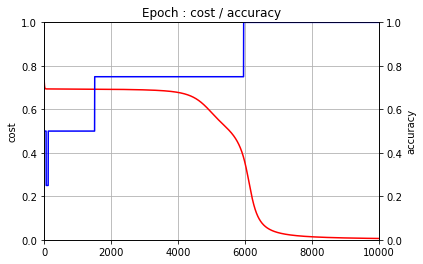

In [12]:
#####################################
#다중 로지스틱스회귀 / 오차역전파 
#######################################
import numpy as np
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
tf.disable_v2_behavior()

epoch_arr = []
cost_arr = []
accuracy_arr = []
step_val = 10000

def graph():
    import matplotlib as mpl
    mpl.rc('axes', unicode_minus = False)
    fig, ax0 = plt.subplots()
    ax1 = ax0.twinx()
    ax0.set_title("Epoch : cost / accuracy")
    ax0.plot(cost_arr, 'r-', label="cost")
    ax0.set_ylabel("cost")
    ax0.axis([0, step_val,0,1])
    ax0.grid(True)
    ax1.plot(accuracy_arr, 'b', label="accuracy")
    ax1.set_ylabel("accuracy")
    ax1.grid(False)
    ax1.set_xlabel("epochs")
    ax1.axis([0, step_val,0,1])
    plt.show()
    
#실행할때마다 같은 결과를 출력하기 위한 seed 값 설정
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

#data = [[0,0,0,1,1,0,1,1]]
#x_data = np.array(data, dtype=np.float32).reshape(-1,2)
x_data = [[0,0],[0,1],[1,0],[1,1]]
y_data = [[0],[1],[1],[0]]

X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

w1 = tf.Variable(tf.random_normal([2,5]), name='weight1')
b1 = tf.Variable(tf.random_normal([5]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X,w1) + b1)
w2 = tf.Variable(tf.random_normal([5,5]), name='weight2')
b2 = tf.Variable(tf.random_normal([5]), name='bias2')
layer2 = tf.sigmoid(tf.matmul(layer1,w2) + b2)
w3 = tf.Variable(tf.random_normal([5,5]), name='weight3')
b3 = tf.Variable(tf.random_normal([5]), name='bias3')
layer3 = tf.sigmoid(tf.matmul(layer2,w3) + b3)
w4 = tf.Variable(tf.random_normal([5,1]), name='weight4')
b4 = tf.Variable(tf.random_normal([1]), name='bias4')
hypothesis = tf.sigmoid(tf.matmul(layer3, w4) + b4) # ax+b의 시그모이드

lr = 0.1           

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1-Y) * tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(lr).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))
                      
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(step_val):
        _, h, p, a, c = sess.run([train, hypothesis, predicted, accuracy, cost], feed_dict={X:x_data, Y:y_data})
        
        epoch_arr.append(i)
        cost_arr.append(c)
        accuracy_arr.append(a)

        if i % (step_val/10) == 0:
            print(i, sess.run(w4), sess.run(b4))
            
        h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
    print("\nHypotesis:", h, "\nCorrect (Y):", c, "\nAccuracy : ", a) 
    
graph()

In [5]:
#####################################
#다중 로지스틱스회귀 / 오차역전파 
#######################################
import numpy as np
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
tf.disable_v2_behavior()

epoch_arr = []
cost_arr = []
accuracy_arr = []
step_val = 10000

def graph():
    import matplotlib as mpl
    mpl.rc('axes', unicode_minus = False)
    fig, ax0 = plt.subplots()
    ax1 = ax0.twinx()
    ax0.set_title("Epoch : cost / accuracy")
    ax0.plot(cost_arr, 'r-', label="cost")
    ax0.set_ylabel("cost")
    ax0.axis([0, step_val,0,1])
    ax0.grid(True)
    ax1.plot(accuracy_arr, 'b', label="accuracy")
    ax1.set_ylabel("accuracy")
    ax1.grid(False)
    ax1.set_xlabel("epochs")
    ax1.axis([0, step_val,0,1])
    plt.show()
    
#실행할때마다 같은 결과를 출력하기 위한 seed 값 설정
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

#data = [[0,0,0,1,1,0,1,1]]
#x_data = np.array(data, dtype=np.float32).reshape(-1,2)
x_data = [[0,0],[0,1],[1,0],[1,1]]
y_data = [[0],[1],[1],[0]]


In [ ]:

X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

w1 = tf.Variable(tf.random_normal([2,5]), name='weight1')
b1 = tf.Variable(tf.random_normal([5]), name='bias1')
layer1 = tf.nn.relu(tf.matmul(X,w1) + b1)
w2 = tf.Variable(tf.random_normal([5,5]), name='weight2')
b2 = tf.Variable(tf.random_normal([5]), name='bias2')
layer2 = tf.nn.relu(tf.matmul(layer1,w2) + b2)
w3 = tf.Variable(tf.random_normal([5,5]), name='weight3')
b3 = tf.Variable(tf.random_normal([5]), name='bias3')
layer3 = tf.nn.relu(tf.matmul(layer2,w3) + b3)
w4 = tf.Variable(tf.random_normal([5,5]), name='weight4')
b4 = tf.Variable(tf.random_normal([5]), name='bias4')
layer4 = tf.nn.relu(tf.matmul(layer3,w4) + b4)
w5 = tf.Variable(tf.random_normal([5,5]), name='weight5')
b5 = tf.Variable(tf.random_normal([1]), name='bias5')
layer5 = tf.nn.relu(tf.matmul(layer4,w5) + b5)
w6 = tf.Variable(tf.random_normal([5,1]), name='weight6')
b6 = tf.Variable(tf.random_normal([1]), name='bias6')
hypothesis = tf.sigmoid(tf.matmul(layer5, w6) + b6) # ax+b의 시그모이드

lr = 0.01           

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1-Y) * tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(lr).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))
                      
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(step_val):
        _, h, p, a, c = sess.run([train, hypothesis, predicted, accuracy, cost], feed_dict={X:x_data, Y:y_data})
        
        epoch_arr.append(i)
        cost_arr.append(c)
        accuracy_arr.append(a)

        if i % (step_val/10) == 0:
            print(i, sess.run(w4), sess.run(b4))
            
        h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
    print("\nHypotesis:", h, "\nCorrect (Y):", c, "\nAccuracy : ", a) 
    
graph()